# randmat tutorial

Showcasing functionality of the randmat package

## Marcenko-Pastur: data and analytics

We generate a Gaussian noise matrix of size $T\times N$, compute the eigenvalues of its correlation matrix, and compare the eigenvalue density to the analytic result of Marcenko-Pastur.

In [ ]:
import randmat.analytics as analytics
import randmat.models as models
import randmat.observables as observables

import matplotlib.pyplot as plt

T = 9000
N = 3000

X = models.G_model(T, N)
evals = observables.sorted_eigenvalues(X, True)

lam, rho, _, _ = analytics.MP(float(N)/T, 1.)

fig = plt.figure()

plt.hist(evals, bins=100, density=True)
plt.plot(lam, rho, '-r', linewidth=2.)

plt.xlabel('eigenvalues')
plt.ylabel('density')

plt.show()

## Low-rank data

We generate a $T\times N$ matrix with low-rank structure of dimension $m$ from the Gaussian-Gaussian model.

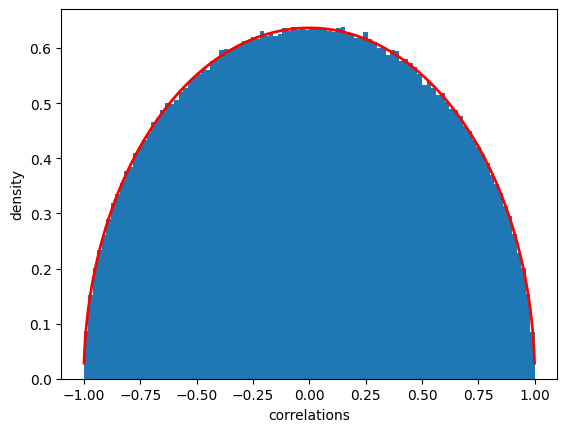

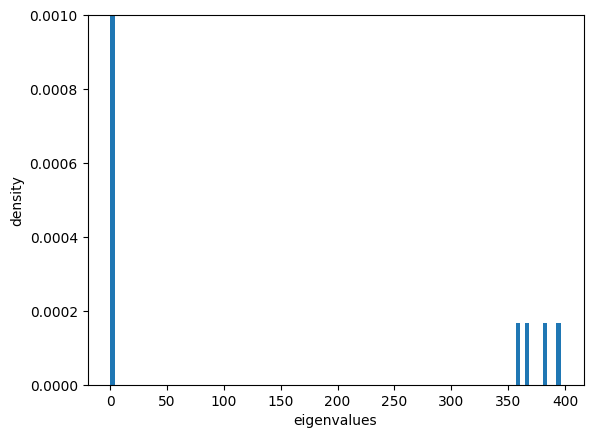

In [10]:
import randmat.models as models
import randmat.observables as observables
import randmat.analytics as analytics

import matplotlib.pyplot as plt

T = 1500
N = 500
m = 4

X = models.GG_model(T, N, m)
corrs = observables.sorted_correlations(X, True)
evals = observables.sorted_eigenvalues(X, True)

x_corrs, Beta = analytics.Beta_distribution_GGmodel(m)


fig = plt.figure()

plt.hist(corrs, bins=100, density=True)
plt.plot(x_corrs, Beta, '-r', linewidth=2.)

plt.xlabel('correlations')
plt.ylabel('density')

plt.show()

fig = plt.figure()

plt.hist(evals, bins=100, density=True)

plt.xlabel('eigenvalues')
plt.ylabel('density')

plt.ylim([0,0.001])

plt.show()

## Sparse mixing data

We generate a $T\times N$ matrix sparsely selecting from a large number of features.

In [ ]:
import randmat.models as models
import randmat.observables as observables

import matplotlib.pyplot as plt

T = 500
N = 1000
m = 500
beta = 0.01 

X = models.DV_model(beta, N, T, m, V_type='Gaussian')
corrs = observables.sorted_correlations(X.T, True)
evals = observables.sorted_eigenvalues(X.T, True)


fig = plt.figure()

plt.hist(corrs, bins=100, density=True)

plt.xlabel('correlations')
plt.ylabel('density')

plt.show()

fig = plt.figure()

plt.hist(evals, bins=100, density=True)

plt.xlabel('eigenvalues')
plt.ylabel('density')

plt.show()